<a href="https://colab.research.google.com/github/Orikson/MAT-421/blob/main/MAT421_Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Root Finding Problem Statement

The roots of a function $f(x)$ is the set of values $R$ such that any $\hat x \in R$ satisfies $f(\hat x) = 0$.

What about functions that have have multiple input dimensions? In this notebook we investigate two functions (with known derivatives), namely
1. $f(x) = x (\cos^2 x + 1)$
  * $\frac{df}{dx} = \cos^2 x + 1 - 2x \sin x \cos x$
2. $f(x,y) = x^2 y + y^2 x$
  * $\frac{\partial f}{\partial x} = 2xy + y^2$
  * $\frac{\partial f}{\partial y} = 2xy + x^2$

Note that while equation 1 has a single root, equation 2 has infinite roots. If we want to figure out some root of equation 2 that has more significance than the function evaluating to 0 at that point, additional constraints are necessary. For purposes of this notebook, finding any root is sufficient.

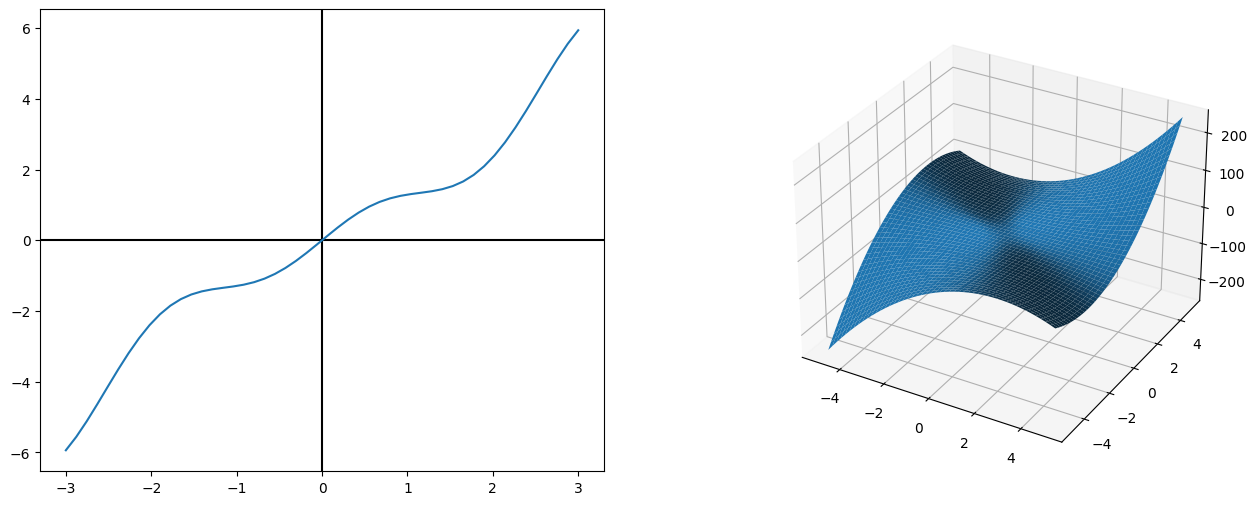

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
  return x * (np.cos(x)**2 + 1)
def f1_x(x):
  return np.cos(x)**2 - 2 * x * np.sin(x) * np.cos(x) + 1

def f2(x, y):
  return x**2 * y + y**2 * x
def f2_x(x, y):
  return 2*y*x + y**2
def f2_y(x, y):
  return 2*y*x + x**2

fig = plt.figure(figsize=(16,6))
x1 = np.linspace(-3, 3, 50)
x2, y2 = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
ax = fig.add_subplot(1, 2, 1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x1, f1(x1))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(x2, y2, f2(x2, y2));

# Tolerance

Tolerance is the amount of acceptable error (deviation from true answer) that a proposed solution has. As such, if a solution has an error below some chosen value of tolerance, then we accept that solution as "good enough" for purposes of that application.

## Error

In the case of root finding, one might choose to use $|f(x_r)|$ as a measure of error, as the smaller $|f(x_r)|$ gets, the closer to $0$ the value is, the likelier it is that $x_r$ is near a root.

In [2]:
# @markdown ## Tolerance for problem 1
tolerance_1 = 1e-5 # @param {type:"number"}

# @markdown ## Tolerance for problem 2
tolerance_2 = 1e-5 # @param {type:"number"}

# Bisection Method

The intermediate value theorem says that for a continuous function, if $f(a) < d < f(c)$ where $a < c$, then there exists $b$ such that $a < b < c$ where $f(b) = d$. If we consider roots, this means that if $\text{sign}(f(a)) \neq \text{sign}(f(c))$ where $a < c$, then there exists $b$ such that $a < b < c$ where $f(b) = 0$.

We can develop an algorithm around this, where we bisect an interval $a < c$ by its midpoint. If the function evaluated at that midpoint is not within an acceptable level of tolerance to a root, then we repeat the procedure, considering instead the interval between the midpoint and whichever endpoint has the opposite sign.

Found approximate root for Function 1: x=-3.814697265625e-06, f(x)=-7.629394531194489e-06
Found approximate root for Function 2: x=-4.57763671875e-05, y=-0.4545745849609375, f(x,y)=-9.460091952462335e-06


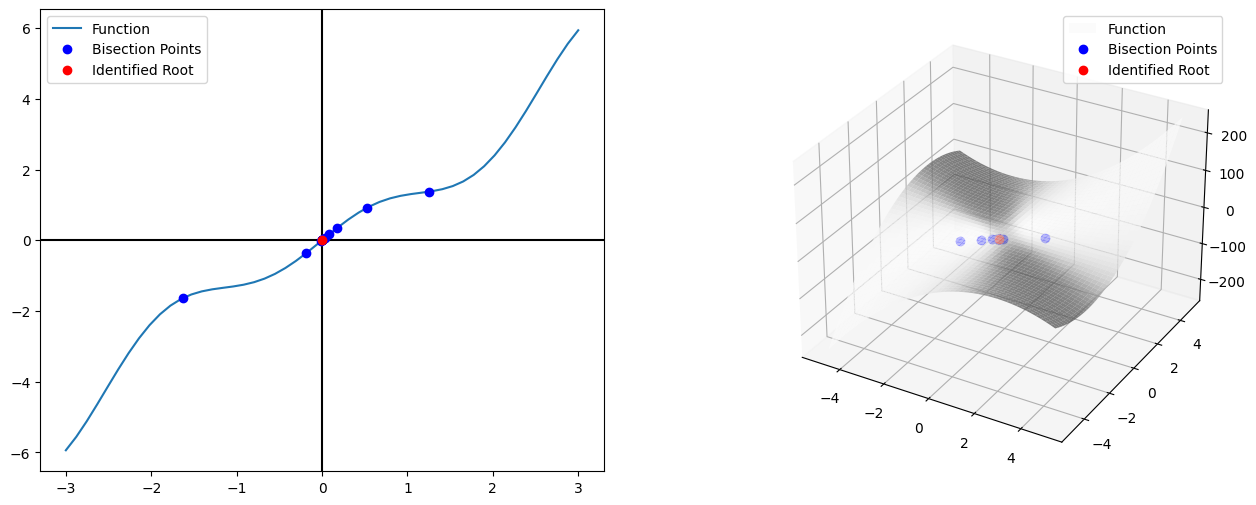

In [7]:
def bisection_method(f, a, b, tolerance):
  if np.sign(f(*a)) == np.sign(f(*b)):
    raise Exception(f'{a} and {b} do not bound a root of f')

  m = (a + b) / 2
  ms = [m]
  while np.abs(f(*m)) > tolerance:
    a = m if np.sign(f(*a)) == np.sign(f(*m)) else a
    b = m if np.sign(f(*b)) == np.sign(f(*m)) else b
    m = (a + b) / 2
    ms.append(m)

  return m, ms

fig = plt.figure(figsize=(16,6))

a1, b1 = np.array([-4.5, 7.0])[:,None]
r1, midpoints1 = bisection_method(f1, a1, b1, tolerance_1)
midpoints1 = np.array(midpoints1).flatten()

a2, b2 = np.array([[-4, -3], [7, 4]])
r2, midpoints2 = bisection_method(f2, a2, b2, tolerance_2)
midpoints2 = np.transpose(np.array(midpoints2))
mx2, my2 = midpoints2

ax = fig.add_subplot(1, 2, 1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x1, f1(x1), label='Function')
ax.plot(midpoints1, f1(midpoints1), 'bo', label='Bisection Points')
ax.plot(*r1, f1(*r1), 'ro', label='Identified Root')
ax.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')

s = ax.plot_surface(x2, y2, f2(x2, y2), label='Function', color='w', alpha=0.75)

# Bug fix for surface label colors; see https://stackoverflow.com/questions/55531760/is-there-a-way-to-label-multiple-3d-surfaces-in-matplotlib
s._facecolors2d = s._facecolor3d
s._edgecolors2d = s._edgecolor3d

ax.plot(mx2, my2, f2(mx2, my2), 'bo', label='Bisection Points')
ax.plot(*r2, f2(*r2), 'ro', label='Identified Root')

ax.legend()

print(f'Found approximate root for Function 1: x={r1[0]}, f(x)={f1(*r1)}')
print(f'Found approximate root for Function 2: x={r2[0]}, y={r2[1]}, f(x,y)={f2(*r2)}')

# Newton-Raphson Method

Under the assumption that an initial guess $x_0$ is "close enough" to the true root $x_r$, for a continuous function we can use a linear estimate to provide a better estimate for the true root, where we find the root of the linear function instead

$$0=f(x_0) + f'(x_0) (x_1 - x_0)$$

We can solve for $x_1$ and find $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$. Notably, this solution does not exist for $f'(x_0) = 0$. In multiple dimensions, this generalizes to the function $x_1 = x_0 - \frac{f(x_0)}{\nabla f(x_0)}$ where $x_0$ and $x_1$ are vectors of arguments to $f$.

Each iteration of finding the next $x_1$ is called a Newton step, which computes a better estimate of the root iteratively until the tolerance is below some threshold.


Found approximate root for Function 1: x=2.5687852896454783e-08, f(x)=5.1375705792909545e-08
Found approximate root for Function 2: x=4.168834201585987e-06, y=0.06805220911783681, f(x,y)=1.930748396023076e-08


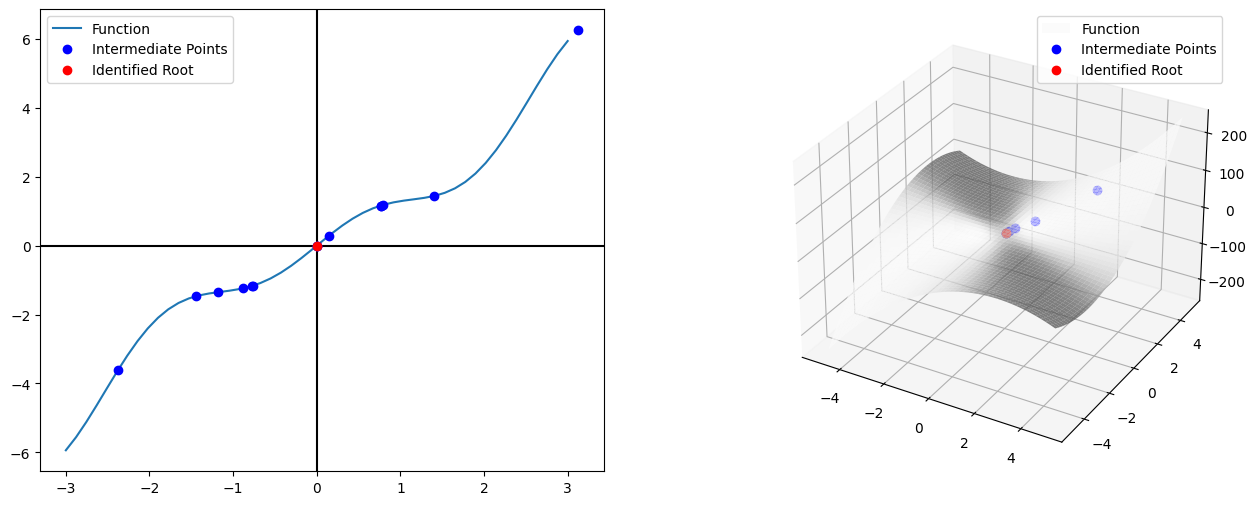

In [8]:
def newton_raphson_method(f, df, x_0, tolerance):
  x_1 = x_0 - f(*x_0) / np.array([df[i](*x_0) for i in range(len(df))])
  x_1s = [x_1]

  while np.abs(f(*x_1)) > tolerance:
    x_0 = x_1
    x_1 = x_0 - f(*x_0) / np.array([df[i](*x_0) for i in range(len(df))])
    x_1s.append(x_1)
  return x_1, x_1s

fig = plt.figure(figsize=(16,6))

x0_1 = np.array([1])
r1, inter1 = newton_raphson_method(f1, [f1_x], x0_1, tolerance_1)
inter1 = np.array(inter1).flatten()

x0_2 = np.array([[7],[10]])
r2, inter2 = newton_raphson_method(f2, [f2_x, f2_y], x0_2, tolerance_2)
inter2 = np.transpose(np.array(inter2))[0]
ix2, iy2 = inter2

ax = fig.add_subplot(1, 2, 1)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.plot(x1, f1(x1), label='Function')
ax.plot(inter1, f1(inter1), 'bo', label='Intermediate Points')
ax.plot(*r1, f1(*r1), 'ro', label='Identified Root')
ax.legend()

ax = fig.add_subplot(1, 2, 2, projection='3d')

s = ax.plot_surface(x2, y2, f2(x2, y2), label='Function', color='w', alpha=0.75)

# Bug fix for surface label colors; see https://stackoverflow.com/questions/55531760/is-there-a-way-to-label-multiple-3d-surfaces-in-matplotlib
s._facecolors2d = s._facecolor3d
s._edgecolors2d = s._edgecolor3d

ax.plot(ix2, iy2, f2(ix2, iy2), 'bo', label='Intermediate Points')
ax.plot(*r2, f2(*r2), 'ro', label='Identified Root')

ax.legend()

print(f'Found approximate root for Function 1: x={r1[0]}, f(x)={f1(*r1)}')
print(f'Found approximate root for Function 2: x={r2[0][0]}, y={r2[1][0]}, f(x,y)={f2(*r2)[0]}')